In [1]:
# Importing necessary libraries for data manipulation,visualization and machine learning
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Loading iris dataset from the skikit-learn, loading and converting into a dataframe
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# Spliting dataset into training (80%) and testing (20%)
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, train_size=0.8, test_size=0.2, random_state=12
)

# Initializing and training KNN classifier
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# Making predictions on training data
train_predictions = knn.predict(train_data)

# Displaying predictions and accuracy
print("Iris Dataset - Predictions:")
print(train_predictions)
print("Target Values:")
print(train_labels)
print(f"Training Accuracy: {accuracy_score(train_labels, train_predictions) * 100:.2f}%")

# Re-evaluating using customized KNN parameters
knn_custom = KNeighborsClassifier(
    algorithm='auto', leaf_size=30, metric='minkowski', p=2,
    metric_params=None, n_jobs=1, n_neighbors=5, weights='uniform'
)
knn_custom.fit(train_data, train_labels)

# Predicting on test data
custom_test_predictions = knn_custom.predict(test_data)

# Displaying testing accuracy
print(f"Testing Accuracy with Custom KNN: {accuracy_score(test_labels, custom_test_predictions) * 100:.2f}%")

Iris Dataset - Predictions:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target Values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Training Accuracy: 97.50%
Testing Accuracy with Custom KNN: 96.67%



Simulated Dataset Results:
Training Accuracy: 100.00%
Testing Accuracy: 100.00%


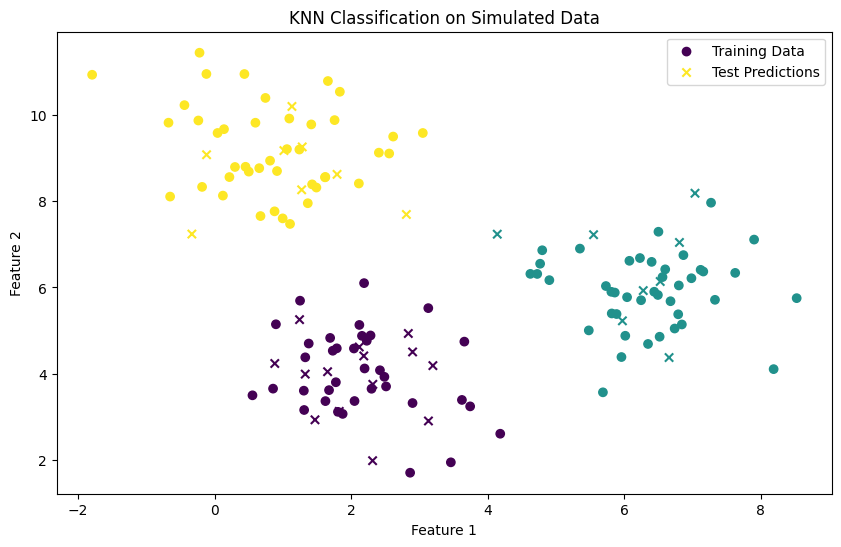

In [2]:
# Generating data using make_blobs
centers = [[2, 4], [6, 6], [1, 9]]  # Cluster centers
n_classes = len(centers)

# Creating simulated dataset
sim_data, sim_labels = make_blobs(n_samples=150, centers=np.array(centers), random_state=1)

# Performing an 80-20 split of data
train_data_sim, test_data_sim, train_labels_sim, test_labels_sim = train_test_split(
    sim_data, sim_labels, train_size=0.8, random_state=12
)

# Training KNN classifier on simulated data
knn_sim = KNeighborsClassifier(n_neighbors=5)
knn_sim.fit(train_data_sim, train_labels_sim)

# Predicting on training and testing sets
train_predictions_sim = knn_sim.predict(train_data_sim)
test_predictions_sim = knn_sim.predict(test_data_sim)

# Calculating and displaying accuracy scores
train_accuracy_sim = accuracy_score(train_labels_sim, train_predictions_sim)
test_accuracy_sim = accuracy_score(test_labels_sim, test_predictions_sim)

print("\nSimulated Dataset Results:")
print(f"Training Accuracy: {train_accuracy_sim * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy_sim * 100:.2f}%")

# Plotting training data and test predictions
plt.figure(figsize=(10, 6))
plt.scatter(train_data_sim[:, 0], train_data_sim[:, 1], c=train_labels_sim, marker='o', label='Training Data')
plt.scatter(test_data_sim[:, 0], test_data_sim[:, 1], c=test_predictions_sim, marker='x', label='Test Predictions')
plt.title('KNN Classification on Simulated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()